In [108]:
#loading packages
import math
import random
import numpy as np
from numpy.random import permutation
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mlab
%matplotlib inline
import scipy.stats as sp
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.neighbors import KNeighborsRegressor
import pylab as pl

In [109]:
#import data sets
df_ws = pd.read_csv('all_players_data.csv', index_col=False, header=0)
df_tm = pd.read_csv('player_data_Sept2017.csv', index_col=0, parse_dates=True)

In [110]:
df_ws.rename(columns={'Goals/90min': 'GpG'}, inplace=True)
df_ws.rename(columns={'DrB (off)': 'DrBoff'}, inplace=True)

In [111]:
df_ws.head()

,Player Name,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
0,Cesar Azpilicueta,0.13,0.34,0.07,0.0,0.3,84.4,7.28,2.4,1.5,...,0.1,0.3,0.5,60.4,0.3,2.5,0.1,0.1,0.1,0.1
1,N Golo Kante,0.1,0.0,0.1,0.0,0.7,86,7.34,3.4,2.1,...,0.1,1,1.2,54.1,0.2,2,0,0.5,0,0.2
2,Tiemoue Bakayoko,0.17,0.25,0.25,0.0,1.3,83.5,7.21,2.9,1.4,...,0.1,1.5,0.6,38.3,0,1.6,0,0.6,0,0.6
3,Alvaro Morata,1.21,0.28,0.19,0.0,3.1,71.1,7.03,0.2,0.1,...,1.2,2.5,0.9,17.8,0,0.7,0,0.7,0.4,2
4,Eden Hazard,1.07,0.24,0.0,0.0,1.7,83.3,7.45,0.2,0,...,0.5,1.5,2.8,33.9,0.3,1.9,0,0.6,0,1.1


In [112]:
df_ws = df_ws.dropna()

In [113]:
df_ws.describe()

,Player Name,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,12536,12536,12536,12536,12536,12536,12536,12536,12536,12536,...,12536,12536,12536,12536,12536,12536,12536,12536,12536,12536
unique,12536,259,119,209,78,56,546,249,55,52,...,23,45,41,699,35,127,12,33,11,38
top,Bram Zwanen,Undefined,Undefined,Undefined,0.0,Undefined,Undefined,0.00,Undefined,Undefined,...,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,0,Undefined,Undefined,Undefined
freq,1,5617,5617,5617,6406,5617,5617,5612,5618,5618,...,5619,5619,5616,5616,5616,5616,5721,5619,5619,5619


In [114]:
df_ws = df_ws.dropna(how='any')

In [115]:
#go back and sort out the player name merge because especially with 
#west african names there are ' and diff spellings 
#df_ws['Player Name'] = df_ws['Player Name'].str.replace("'", '')

In [116]:
#is there a way to do all of these at once
df_ws = df_ws[df_ws.GpG != 'Undefined']

In [117]:
df_ws = df_ws[df_ws.Tackles != 'Undefined']

In [118]:
df_ws = df_ws[df_ws.DrBoff != 'Undefined']

In [119]:
df_ws = df_ws[df_ws.OutOfBox != 'Undefined']

In [120]:
#converting data from whoscored to numeric
df_ws[['GpG', 'Assists/90min', 'Yel/90min', 'Red/90min', 'SpG', 'PS%', 'Rating', 'Tackles', 'Inter', 'Fouls (def)', 'Offsides', 'Clear', 'DrB (def)', 'Blocks', 'DrBoff','Fouled (off)', 'Off (off)', 'Disp (off)', 'KeyP', 'AvgP', 'Crosses', 'LongB', 'ThrB', 'OutOfBox', 'SixYardBox', 'PenaltyArea' ]] = df_ws[['GpG', 'Assists/90min', 'Yel/90min', 'Red/90min', 'SpG', 'PS%', 'Rating', 'Tackles', 'Inter', 'Fouls (def)', 'Offsides', 'Clear', 'DrB (def)', 'Blocks', 'DrBoff','Fouled (off)', 'Off (off)', 'Disp (off)', 'KeyP', 'AvgP', 'Crosses', 'LongB', 'ThrB', 'OutOfBox', 'SixYardBox', 'PenaltyArea']].apply(pd.to_numeric)
#df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)


In [121]:
df_ws.describe()

,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,Rating,Tackles,Inter,Fouls (def),...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,...,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000
mean,0.438923,0.090391,0.366647,0.025109,0.781247,75.179931,6.633448,1.148068,0.887050,0.929127,...,0.128100,0.707293,0.579091,27.197858,0.275141,1.988222,0.026986,0.334409,0.049342,0.400955
std,5.279474,1.095836,2.861676,0.617253,0.781985,12.830127,0.390793,0.899486,0.844842,0.645789,...,0.245339,0.677156,0.580674,15.335640,0.440288,2.094405,0.075585,0.425575,0.103117,0.486024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.610000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.200000,70.300000,6.360000,0.400000,0.200000,0.500000,...,0.000000,0.100000,0.100000,15.500000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.150000,0.000000,0.600000,77.600000,6.630000,1.000000,0.700000,0.900000,...,0.000000,0.500000,0.400000,26.100000,0.100000,1.400000,0.000000,0.200000,0.000000,0.300000
75%,0.210000,0.110000,0.310000,0.000000,1.100000,82.900000,6.900000,1.700000,1.400000,1.300000,...,0.200000,1.000000,0.900000,37.100000,0.400000,2.800000,0.000000,0.500000,0.100000,0.600000
max,270.000000,90.000000,90.000000,45.000000,7.000000,100.000000,8.990000,8.000000,8.000000,5.000000,...,2.400000,5.100000,4.200000,101.200000,3.300000,14.300000,1.500000,3.700000,1.000000,4.800000


In [122]:
df_tm = df_tm.rename(columns={'Current.market.value': 'current_market_value', 'Current.club': 'current_club','Highest.market.value': 'highest_market_value', 'Place.of.birth': 'place_of_birth', 'Date.of.birth': 'date_of_birth', 'Country.of.birth': 'country_of_birth','Continent.specific': 'continent_specific'})

In [123]:
#adjust the data to get outliers out
df_tmh = df_tm.sort_values('highest_market_value', ascending=False)
df_tmh = df_tmh[df_tmh['current_market_value'] >= 1000000]
df_tmh = df_tmh[df_tmh['highest_market_value'] <= 30000000]

In [124]:
df_tmh.loc[df_tm['Position'].str.contains('Striker', case=False), 'Position'] = 'Striker'
df_tmh.loc[df_tm['Position'].str.contains('Midfield', case=False), 'Position'] ='Midfielder'
df_tmh.loc[df_tm['Position'].str.contains('Defence', case=False), 'Position'] = 'Defender'

In [125]:
#there are definitely issues here bc of different name for same person. need to use solution for 98% match or use dob 
#scraped from transfermarkt
df = pd.merge(left=df_tmh, right=df_ws, left_on='Name', right_on='Player Name')

In [126]:
df['west_african'] = np.where(df['continent_specific']=="West Africa", 'yes', 'no')

In [127]:
#df['top_team'] = np.where(df['current_club']=="West Africa", 'yes', 'no')

In [128]:
df.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,Off (off),Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea
count,3121.000000,104.000000,3.126000e+03,3.126000e+03,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,...,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000,3126.000000
mean,1.816934,9.894231,4.716820e+06,6.507294e+06,0.428141,0.087095,0.308042,0.026091,0.907582,77.102367,...,0.149904,0.779335,0.670921,30.355758,0.317210,2.090947,0.034485,0.388676,0.058093,0.465931
std,0.066687,1.202088,5.298248e+06,6.353580e+06,5.594052,0.164201,1.872454,0.807000,0.821949,10.954478,...,0.262514,0.698117,0.612564,15.643642,0.479631,2.035903,0.082098,0.452930,0.109326,0.508016
min,1.600000,7.500000,1.000000e+06,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.770000,9.000000,1.500000e+06,2.000000e+06,0.000000,0.000000,0.000000,0.000000,0.300000,72.600000,...,0.000000,0.200000,0.200000,18.425000,0.000000,0.500000,0.000000,0.000000,0.000000,0.100000
50%,1.820000,10.000000,2.500000e+06,4.000000e+06,0.060000,0.000000,0.170000,0.000000,0.700000,79.000000,...,0.000000,0.600000,0.500000,29.250000,0.100000,1.500000,0.000000,0.300000,0.000000,0.300000
75%,1.860000,10.500000,5.000000e+06,8.000000e+06,0.280000,0.130000,0.320000,0.000000,1.300000,84.000000,...,0.200000,1.200000,1.000000,40.875000,0.500000,3.000000,0.000000,0.600000,0.100000,0.700000
max,2.030000,13.000000,3.000000e+07,3.000000e+07,270.000000,2.900000,90.000000,45.000000,5.300000,100.000000,...,2.400000,5.100000,4.200000,101.100000,3.300000,13.000000,1.000000,3.700000,1.000000,3.900000


In [129]:
df.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,Disp (off),KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african
0,Cesar Azpilicueta,"Aug 28, 1989","Pamplona, Spain",28,1.78,NaN,Spain,Defender,right,Chelsea FC,...,0.3,0.5,60.4,0.3,2.5,0.1,0.1,0.1,0.1,no
1,Jesus Navas,"Nov 21, 1985","Los Palacios y Villafranca, Spain",31,1.70,NaN,Spain,Striker,right,Sevilla FC,...,0.8,0.8,28.2,0.3,1.0,0.0,0.1,0.0,0.6,no
2,Roberto Soldado,"May 27, 1985","Valencia, Spain",32,1.80,NaN,Spain,Striker,both,Fenerbahce SK,...,0.1,0.3,11.4,0.0,0.0,0.0,0.3,0.3,0.4,no
3,Morgan Schneiderlin,"Nov 8, 1989","Zellwiller, France",27,1.86,NaN,France,Midfielder,right,Everton FC,...,0.3,0.5,47.4,0.0,2.6,0.0,0.2,0.0,0.2,no
4,Jose Gimenez,"Jan 20, 1995","Toledo, Uruguay",22,1.85,NaN,"Uruguay, Spain",Defender,right,Atletico Madrid,...,0.3,0.4,28.0,0.1,1.9,0.0,0.0,0.1,0.5,no


In [130]:
df = df.sort_values('GpG', ascending=False)
df = df[df['GpG'] < 5]
df = df[df['Yel/90min'] < 5]
df = df[df['Red/90min'] < 5]

In [131]:
rat_bins=[5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10]
df['binned_values'] = np.digitize(df.Rating.values, bins=rat_bins)  

In [132]:
ratty_bins = [5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9, 9.25, 9.5, 9.75, 10]
df['binny_values'] = np.digitize(df.Rating.values, bins=ratty_bins)

In [133]:
df.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,binned_values,binny_values
count,3093.000000,101.000000,3.098000e+03,3.098000e+03,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,...,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000
mean,1.816980,9.896040,4.730126e+06,6.522240e+06,0.209635,0.086679,0.243231,0.011801,0.911814,77.192673,...,0.675274,30.577728,0.319496,2.108554,0.034797,0.391317,0.058457,0.467172,17.757263,7.404454
std,0.066621,1.215148,5.308189e+06,6.358421e+06,0.396043,0.156900,0.360977,0.061853,0.822725,10.636448,...,0.612771,15.528745,0.480778,2.036398,0.082402,0.453279,0.109396,0.508237,3.763661,1.528992
min,1.600000,7.500000,1.000000e+06,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.770000,9.000000,1.500000e+06,2.000000e+06,0.000000,0.000000,0.000000,0.000000,0.300000,72.625000,...,0.200000,18.700000,0.000000,0.600000,0.000000,0.000000,0.000000,0.100000,15.000000,6.000000
50%,1.820000,10.000000,2.500000e+06,4.000000e+06,0.060000,0.000000,0.170000,0.000000,0.700000,79.000000,...,0.500000,29.450000,0.100000,1.500000,0.000000,0.300000,0.000000,0.300000,18.000000,7.000000
75%,1.860000,10.500000,5.000000e+06,8.000000e+06,0.270000,0.130000,0.320000,0.000000,1.300000,84.000000,...,1.000000,41.000000,0.500000,3.000000,0.000000,0.600000,0.100000,0.700000,20.000000,8.000000
max,2.030000,13.000000,3.000000e+07,3.000000e+07,4.550000,2.900000,4.090000,1.650000,5.300000,100.000000,...,4.200000,101.100000,3.300000,13.000000,1.000000,3.700000,1.000000,3.900000,33.000000,14.000000


In [134]:
def tteam (current_club):
    if 'Manchester United' in current_club:
        return 1
    elif 'FC Barcelona' in current_club:
        return 1
    elif 'Real Madrid' in current_club:
        return 1
    elif 'Bayern Munich' in current_club:
        return 1
    elif 'Manchester City' in current_club:
        return 1
    elif 'Arsenal FC' in current_club:
        return 1
    elif 'Chelsea FC' in current_club:
        return 1
    elif 'Liverpool FC' in current_club:
        return 1
    elif 'Juventus FC' in current_club:
        return 1
    elif 'Tottenham Hotspur' in current_club:
        return 1
    elif 'Paris Saint-Germain' in current_club:
        return 1
    elif 'Borussia Dortmund' in current_club:
        return 1
    elif 'AC Milan' in current_club:
        return 1
    elif 'Atletico Madrid' in current_club:
        return 1
    elif 'West Ham United' in current_club:
        return 1
    else:
        return 0
    
df['top_team'] = df['current_club'].apply(tteam)

In [135]:
df.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african,binned_values,binny_values,top_team
2006,Dominic Solanke,"Sep 14, 1997","Basingstoke, England",19,1.86,NaN,"England, Nigeria",Striker,right,Liverpool FC,...,0.0,0.0,0.0,0.4,0.1,0.4,no,13,5,1
2794,Fred Friday,"May 22, 1995",Undefined,22,1.87,NaN,Nigeria,Striker,both,AZ Alkmaar,...,0.0,0.0,0.0,0.3,0.0,0.7,no,13,5,0
1355,Muhammet Demir,"Jan 10, 1992","Trabzon, Turkey",25,1.80,NaN,Turkey,Striker,right,Demir Grup Sivasspor,...,0.0,0.3,0.0,0.5,0.0,0.0,no,10,4,0
2425,Tornike Okriashvili,"Feb 12, 1992","Tiflis, Georgia",25,1.81,NaN,Georgia,Midfielder,both,FK Krasnodar,...,0.0,0.3,0.0,0.3,0.3,0.0,no,13,6,0
1799,Dawid Kownacki,"Mar 14, 1997","Gorzow Wielkopolski, Poland",20,1.85,NaN,Poland,Striker,right,UC Sampdoria,...,0.0,0.0,0.0,0.0,0.3,0.8,no,16,7,0


In [142]:
Avg=df.groupby(['binned_values','top_team'], as_index=False)['current_market_value'].mean()

In [149]:
Avg.head()

,binned_values,top_team,current_market_value
0,0,0,1.000000e+06
1,5,0,2.000000e+06
2,6,0,1.800000e+06
3,7,0,3.500000e+06
4,8,0,3.542857e+06


In [150]:
# 0 to 33 bins
Avg.describe()

,binned_values,top_team,current_market_value
count,47.000000,47.000000,4.700000e+01
mean,18.595745,0.361702,8.104988e+06
std,7.789791,0.485688,5.758232e+06
min,0.000000,0.000000,1.000000e+06
25%,13.000000,0.000000,3.521429e+06
50%,19.000000,0.000000,5.500000e+06
75%,24.500000,1.000000,1.419375e+07
max,33.000000,1.000000,2.200000e+07


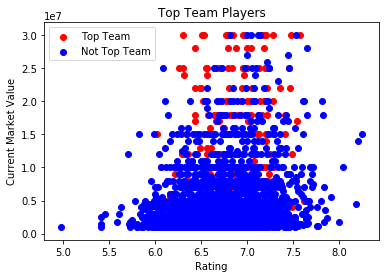

In [136]:
plt.scatter(
    df[df['top_team'] == 1].Rating,
    df[df['top_team'] == 1].current_market_value,
    color='red'
)
plt.scatter(
    df[df['top_team'] == 0].Rating,
   df[df['top_team'] == 0].current_market_value,
    color='blue'
)
plt.legend(['Top Team', 'Not Top Team'])
plt.title('Top Team Players')
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.show()

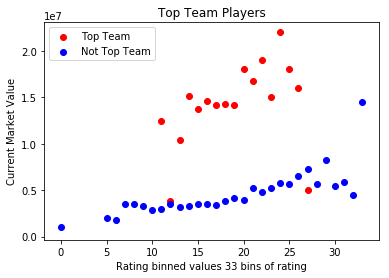

In [151]:
plt.scatter(
    Avg[Avg['top_team'] == 1].binned_values,
    Avg[Avg['top_team'] == 1].current_market_value,
    color='red'
)
plt.scatter(
    Avg[Avg['top_team'] == 0].binned_values,
   Avg[Avg['top_team'] == 0].current_market_value,
    color='blue'
)
plt.legend(['Top Team', 'Not Top Team'])
plt.title('Top Team Players')
plt.xlabel('Rating binned values 33 bins of rating')
plt.ylabel('Current Market Value')
plt.show()

In [155]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
A = df[['Rating', 'current_market_value']]
B = df.top_team
neighbors.fit(A,B)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[7, 1000000]])

array([0])

In [156]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
C = Avg[['binned_values', 'current_market_value']]
D = Avg.top_team
neighbors.fit(C,D)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[15, 15000000]])

array([1])

In [162]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = Avg[['binned_values', 'current_market_value']]
Y = Avg.top_team
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[8, 15000000]]))
print(neighbors.predict_proba([[25, 15000000]]))

[1]
[[ 0.2  0.8]]


In [163]:
X = np.array(X)
Y = np.array(Y)

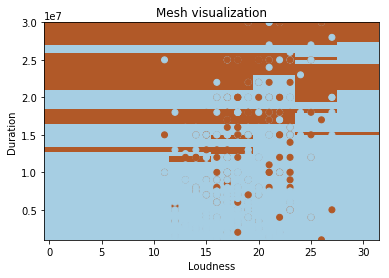

In [73]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

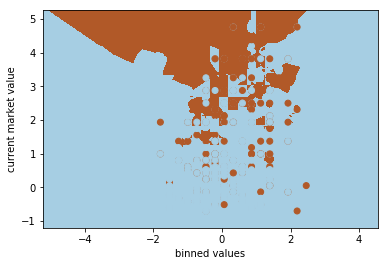

In [167]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'binned_values': stats.zscore(df.binned_values),
    'current_market_value': stats.zscore(df.current_market_value)
})

# Fit our model.
Y = df.top_team
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('binned values')
plt.ylabel('current market value')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

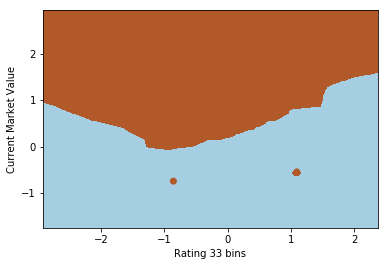

In [172]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
E = pd.DataFrame({
    'binned_values': stats.zscore(Avg.binned_values),
    'current_market_value': stats.zscore(Avg.current_market_value)
})

# Fit our model.
F = Avg.top_team
neighbors.fit(E, F)

# Arrays, not data frames, for the mesh.
E = np.array(E)
F = np.array(F)

# Mesh size.
m = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
e_min = E[:,0].min() - .5
e_max = E[:,0].max() + .5
f_min = E[:,1].min() - .5
f_max = E[:,1].max() + .5
ee, ff = np.meshgrid(
    np.arange(e_min, e_max, m),
    np.arange(f_min, f_max, m)
)
Z = neighbors.predict(np.c_[ee.ravel(), ff.ravel()])

# Put the result into a color plot
Z = Z.reshape(ee.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(ee, ff, Z)

# Add the training points to the plot.
plt.scatter(E[:, 0], E[:, 1], c=F)
plt.xlabel('Rating 33 bins')
plt.ylabel('Current Market Value')

plt.xlim(ee.min(), ee.max())
plt.ylim(ff.min(), ff.max())

plt.show()

In [ ]:
#Choosing  kk  is a tradeoff. The larger the  kk  the more smoothed out your decision 
#space will be, with more observations getting a vote in the prediction. 
#A smaller  kk  will pick up more subtle deviations, but these deviations could be 
#just randomness and therefore you could just be overfitting. Add in weighting and that's an 
#additional dimension to this entire conversation.

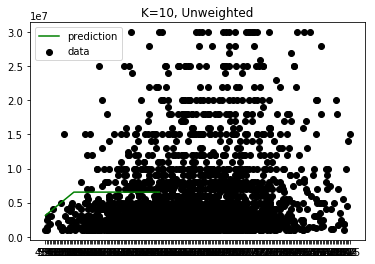

In [195]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.Rating)
Y = df.current_market_value
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 100, 20)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

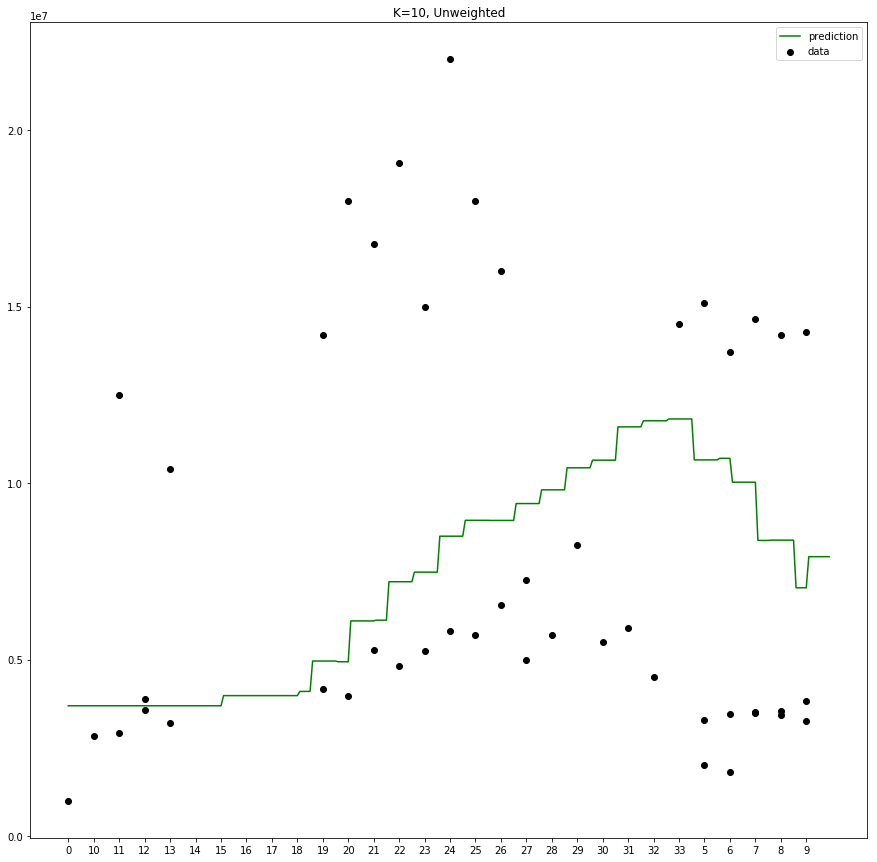

In [197]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(Avg.binned_values)
Y = Avg.current_market_value
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 30, .1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.figure(figsize=(15,15))
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

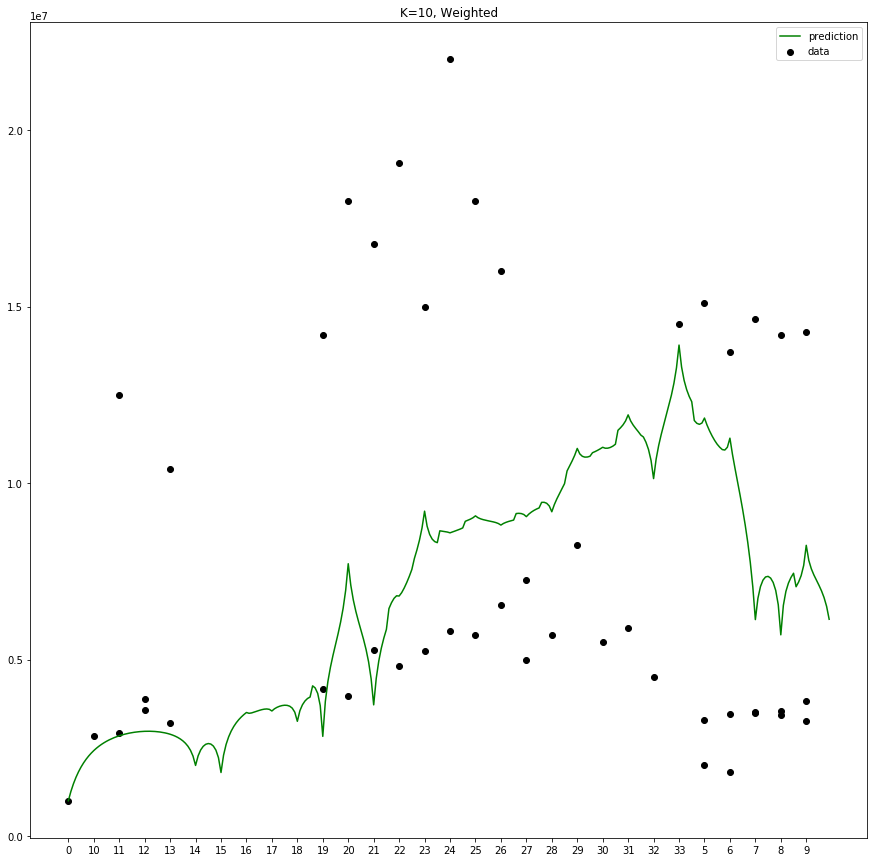

In [199]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(Avg.binned_values)
Y = Avg.current_market_value
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 30, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.figure(figsize=(15,15))
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [186]:
Avg.describe()

,binned_values,top_team,current_market_value
count,47.000000,47.000000,4.700000e+01
mean,18.595745,0.361702,8.104988e+06
std,7.789791,0.485688,5.758232e+06
min,0.000000,0.000000,1.000000e+06
25%,13.000000,0.000000,3.521429e+06
50%,19.000000,0.000000,5.500000e+06
75%,24.500000,1.000000,1.419375e+07
max,33.000000,1.000000,2.200000e+07


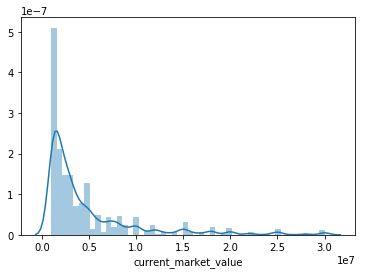

In [26]:
sns.distplot(df['current_market_value'])


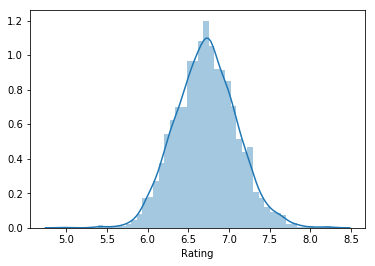

In [27]:
sns.distplot(df['Rating'])

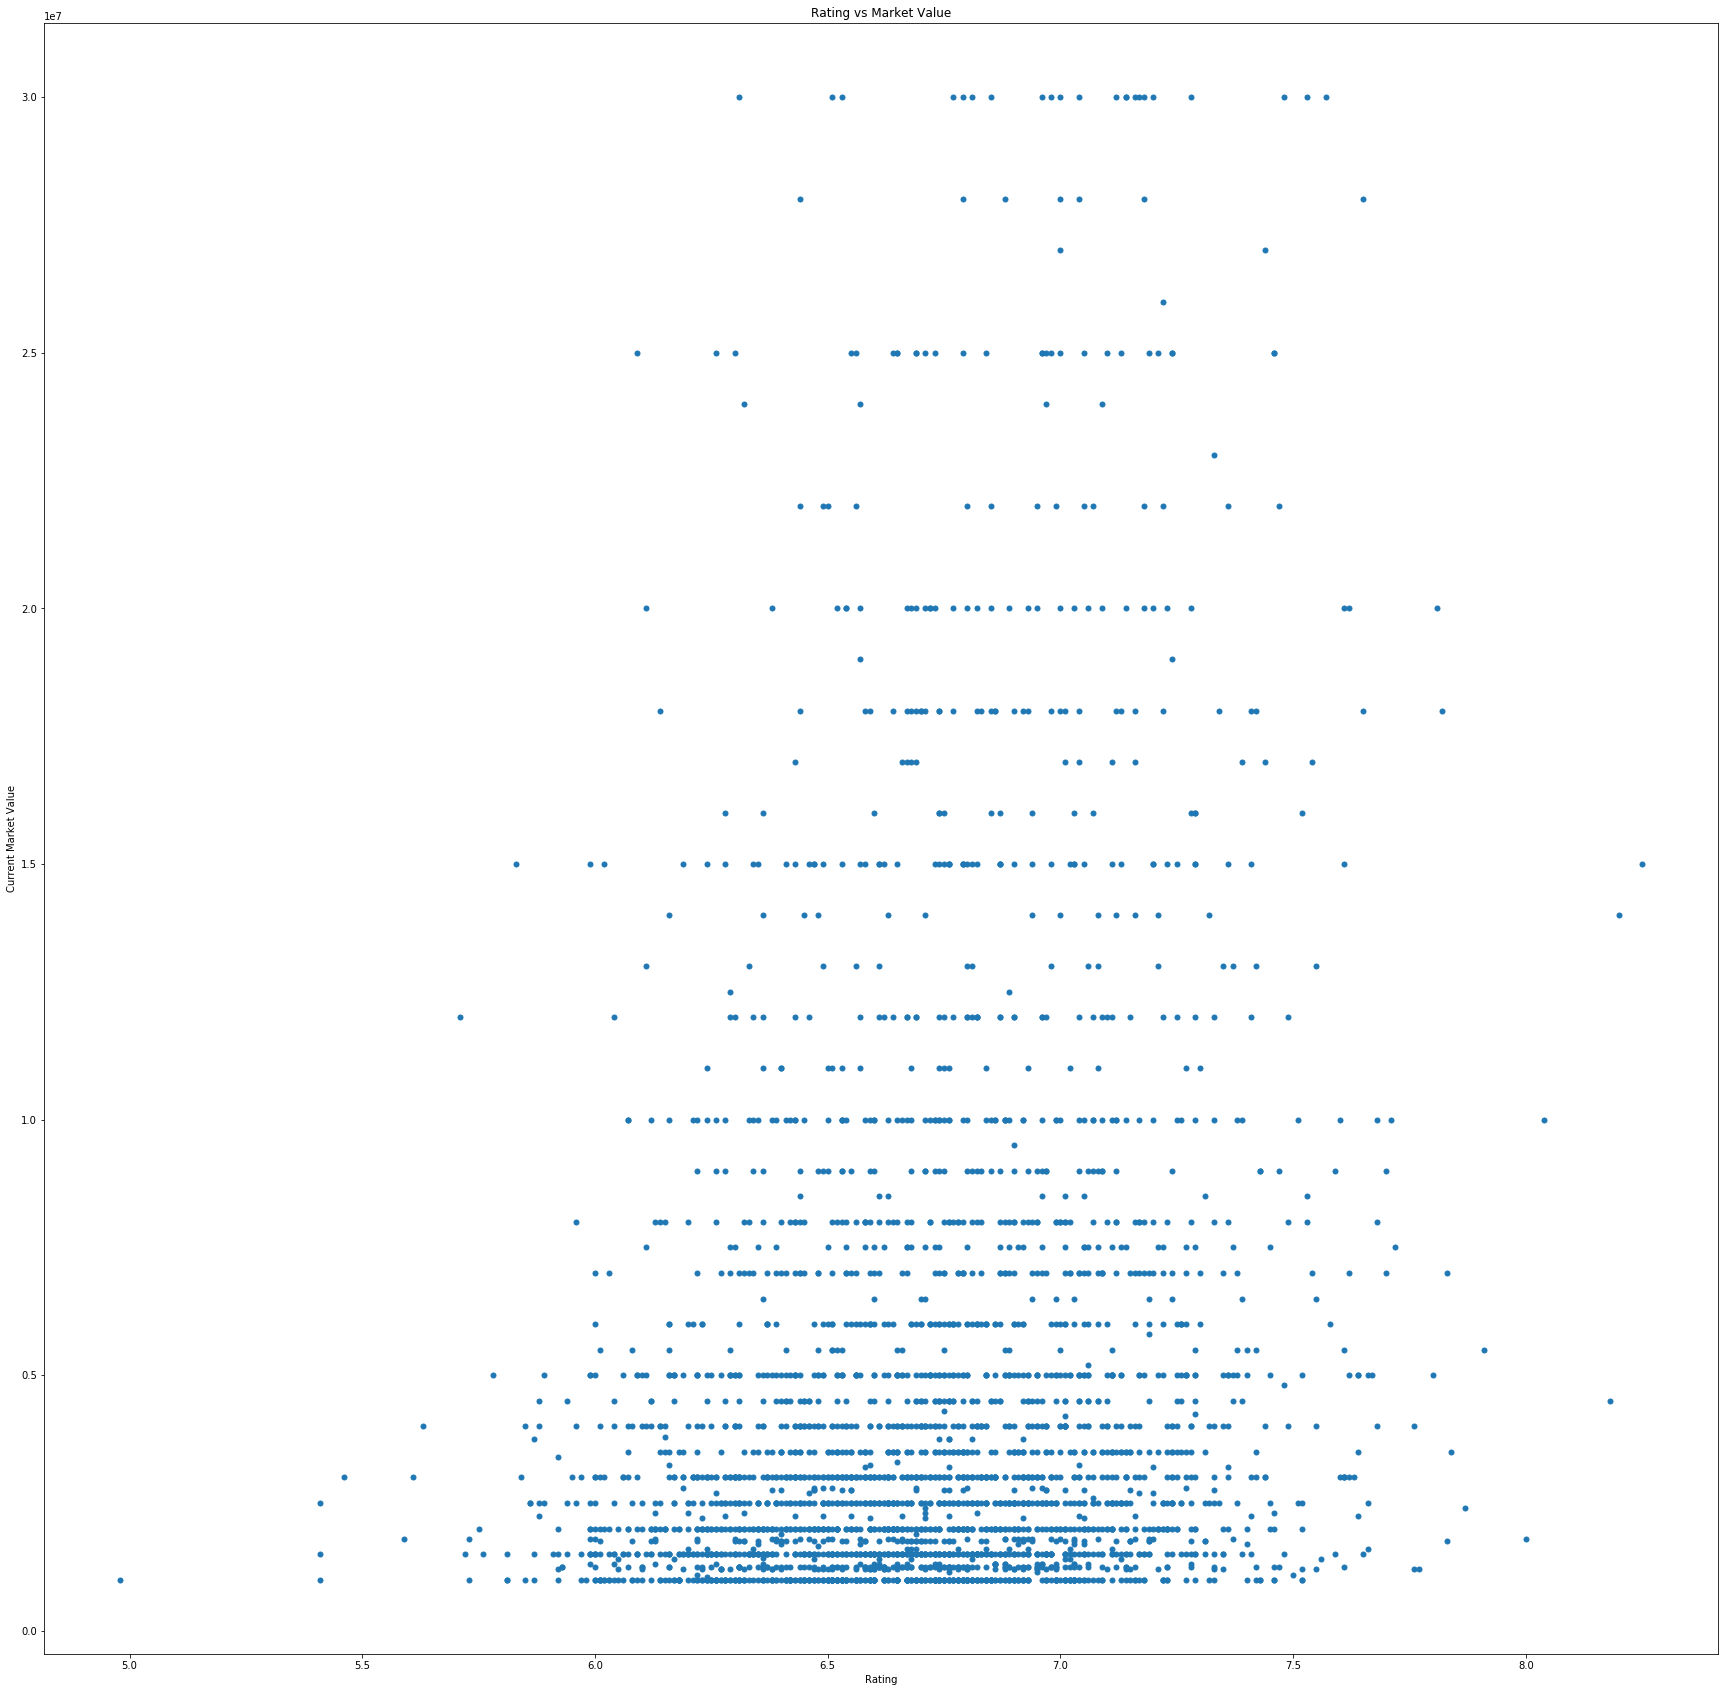

In [28]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'current_market_value', data=df, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.title('Rating vs Market Value')
plt.show()

In [29]:
#tried to see if there is correlation between goals per game and rating
#seems like there isnt much of one in this data set
df['GpG'].corr(df['Rating'])


0.062668451118840576

In [30]:
df['KeyP'].corr(df['current_market_value'])

0.11674409459085502

In [31]:
#look at correlation between rating and market value
df['Rating'].corr(df['current_market_value'])

0.19208141531556841

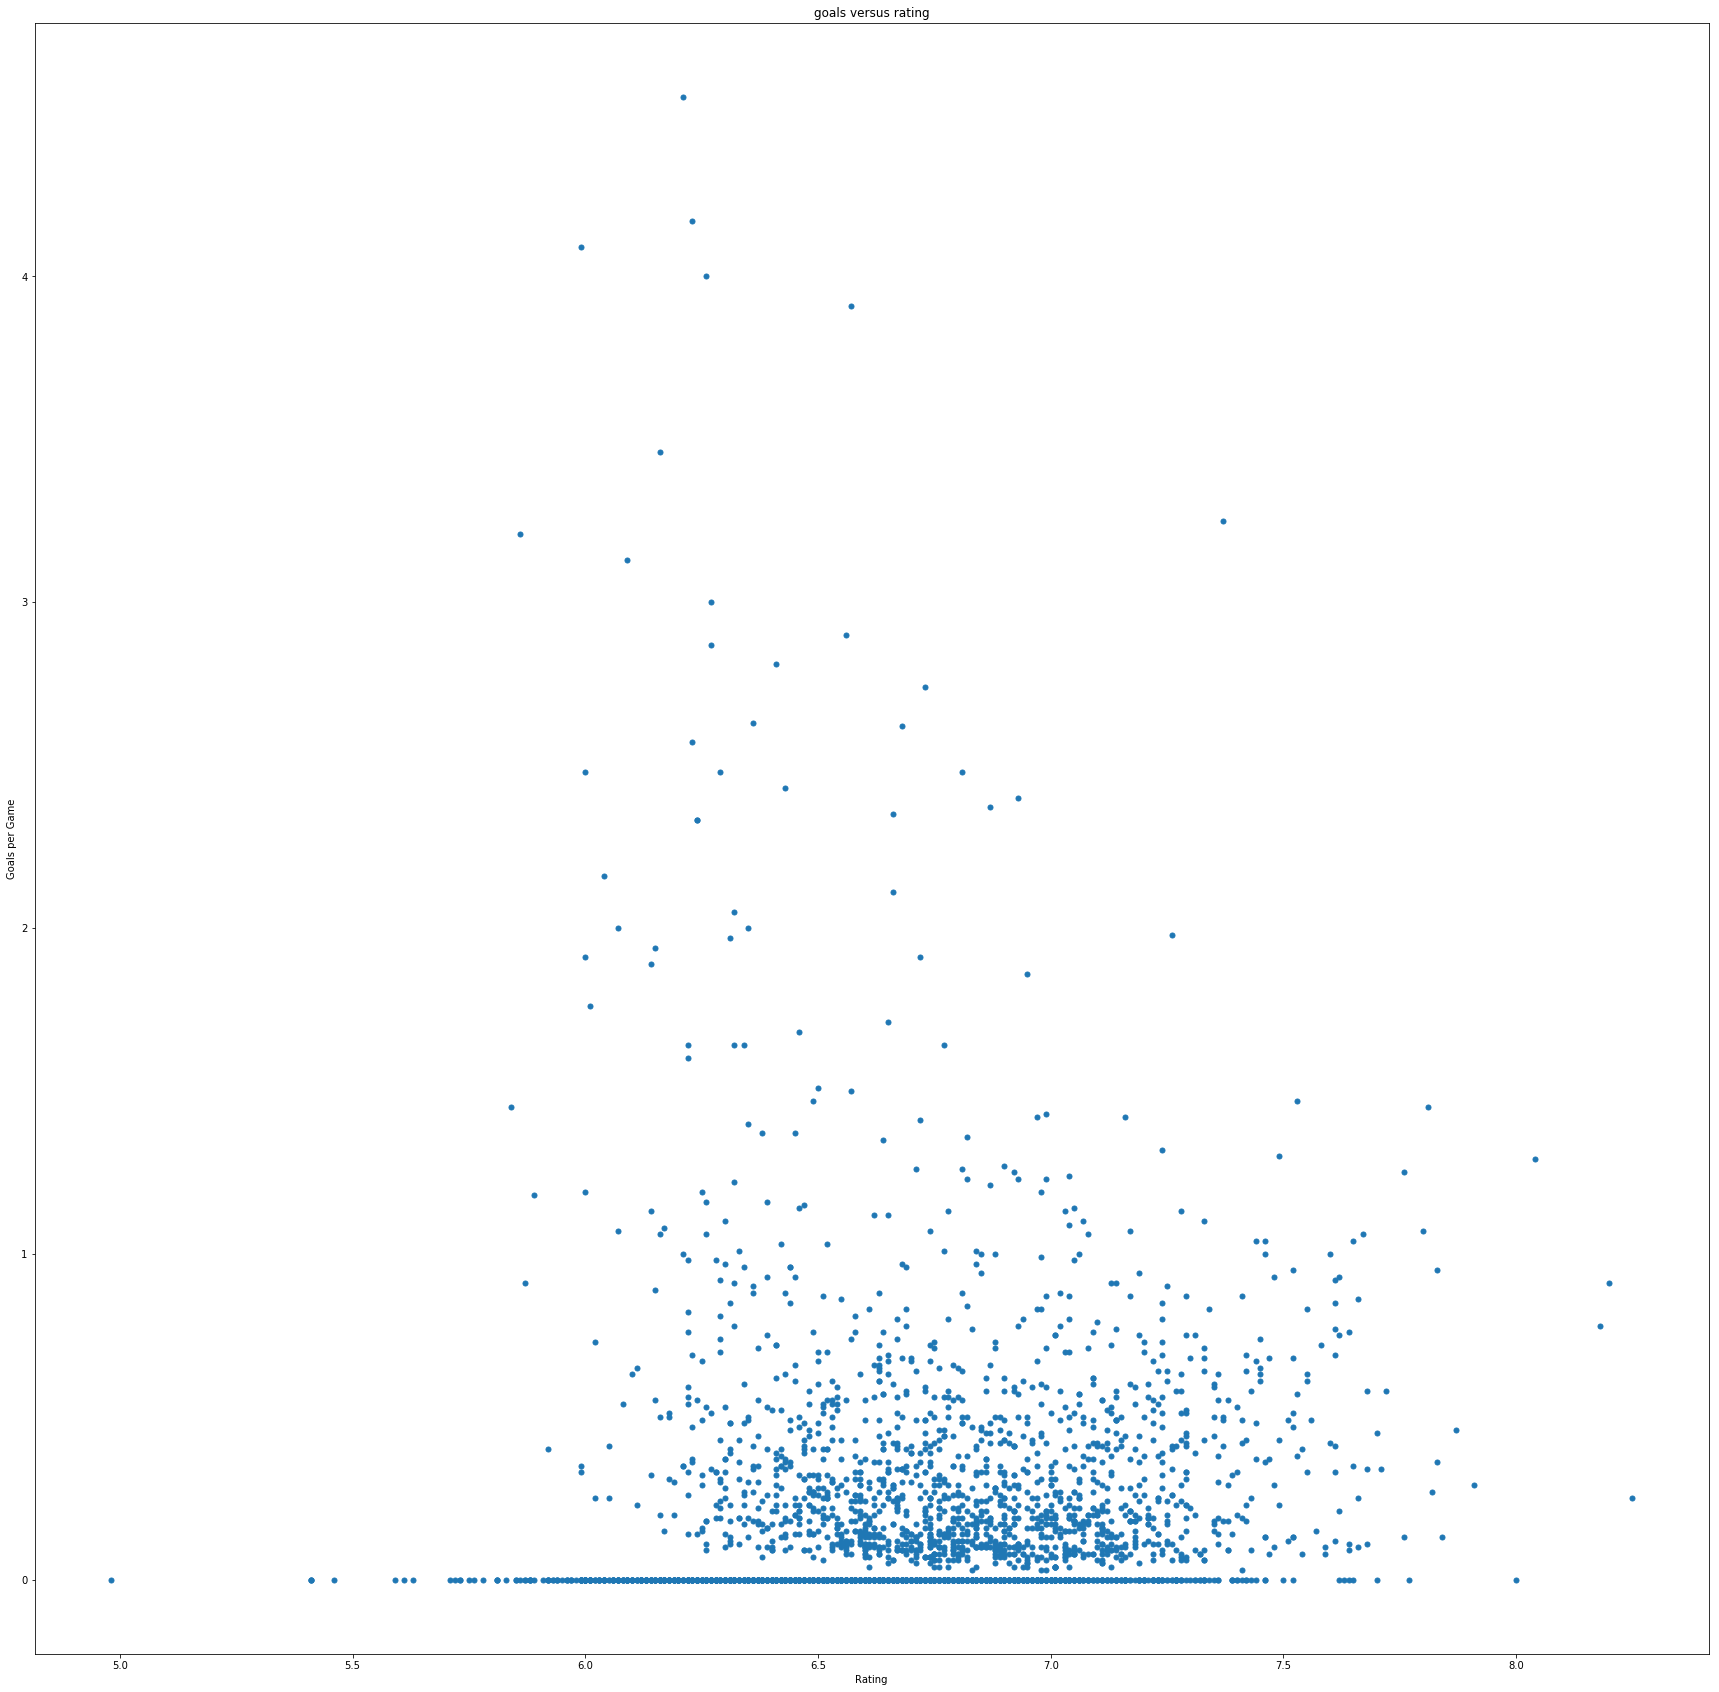

In [32]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'GpG', data=df, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Goals per Game')
plt.title('goals versus rating')
plt.show()


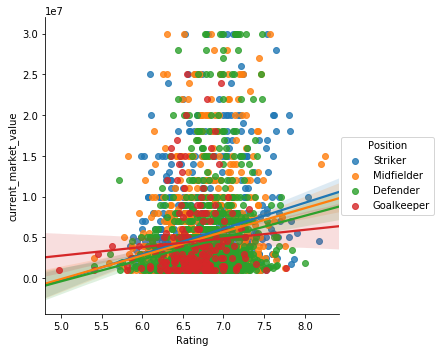

In [33]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="Position", data=df)

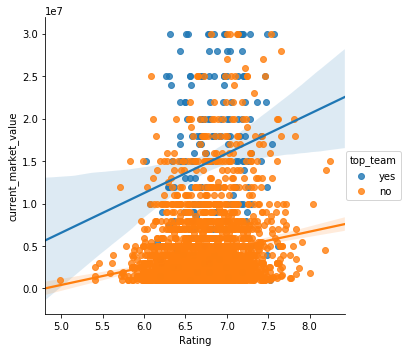

In [132]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="top_team", data=df)

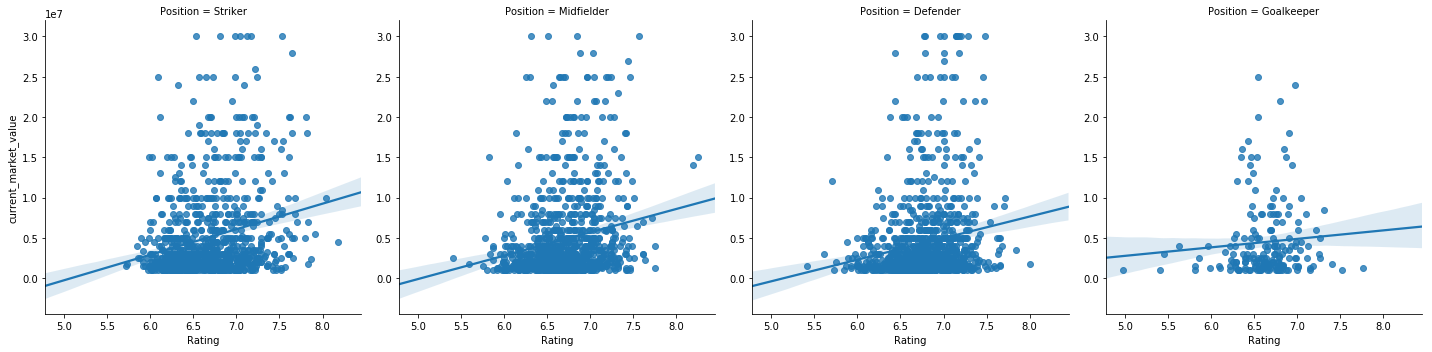

In [35]:
g = sns.lmplot(x="Rating", y="current_market_value", col="Position", data=df)

Text(268.152,0.5,'Market Value x 10 million')

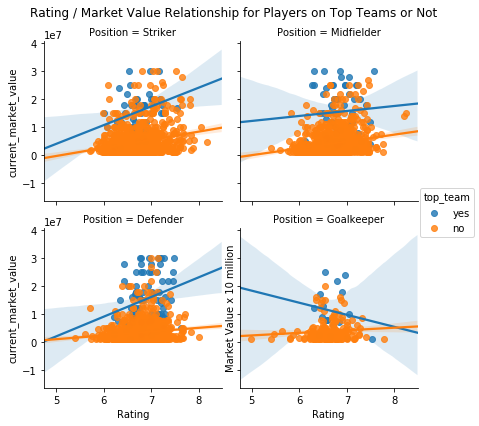

In [137]:
g = sns.lmplot(x="Rating", y="current_market_value", col="Position", hue="top_team",
               data=df, col_wrap=2, size=3)
g.fig.suptitle('Rating / Market Value Relationship for Players on Top Teams or Not')
g.fig.subplots_adjust(top=.9)
# Set x-axis label
plt.xlabel('Rating')
g.fig.subplots_adjust(top=.9)
# Set y-axis label
plt.ylabel('Market Value x 10 million')

In [37]:
striker = ['Striker']
df_st = df[df.Position.isin(striker)]

In [38]:
df_st.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african,binned_values,binny_values
2006,Dominic Solanke,"Sep 14, 1997","Basingstoke, England",19,1.86,NaN,"England, Nigeria",Striker,right,Liverpool FC,...,5.8,0.0,0.0,0.0,0.4,0.1,0.4,no,13,5
2794,Fred Friday,"May 22, 1995",Undefined,22,1.87,NaN,Nigeria,Striker,both,AZ Alkmaar,...,14.0,0.0,0.0,0.0,0.3,0.0,0.7,no,13,5
1355,Muhammet Demir,"Jan 10, 1992","Trabzon, Turkey",25,1.80,NaN,Turkey,Striker,right,Demir Grup Sivasspor,...,3.3,0.0,0.3,0.0,0.5,0.0,0.0,no,10,4
1799,Dawid Kownacki,"Mar 14, 1997","Gorzow Wielkopolski, Poland",20,1.85,NaN,Poland,Striker,right,UC Sampdoria,...,6.8,0.0,0.0,0.0,0.0,0.3,0.8,no,16,7
1011,Munas Dabbur,"May 14, 1992","Nazareth, Israel",25,1.82,NaN,Israel,Striker,right,Red Bull Salzburg,...,34.8,0.0,1.0,0.3,1.5,0.0,2.0,no,24,10


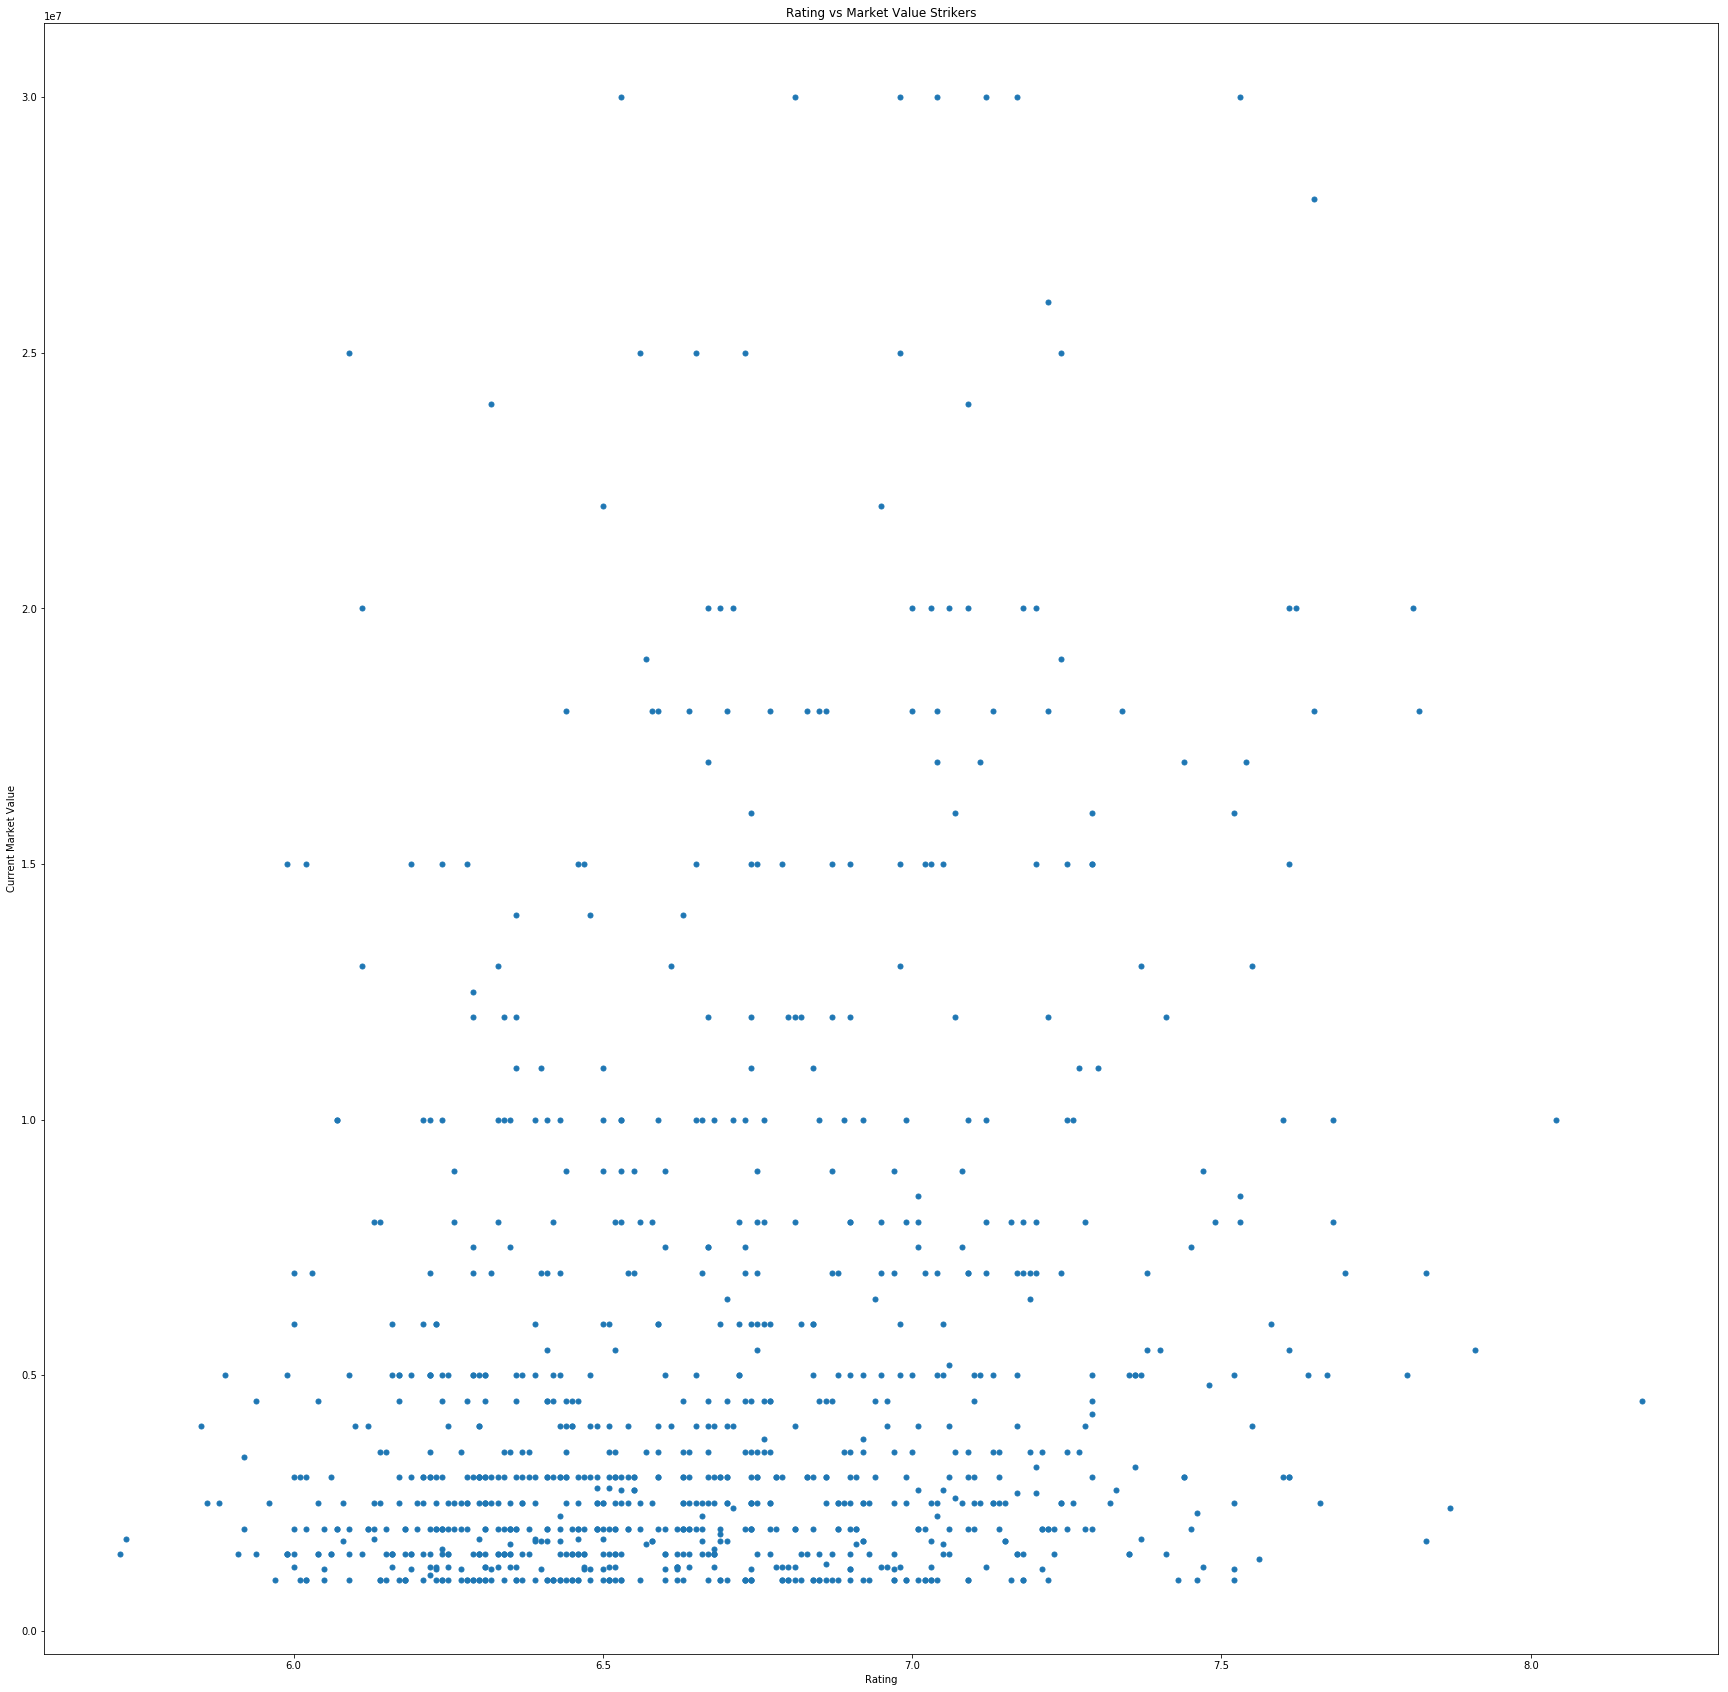

In [39]:
plt.figure(figsize=(30,30))
plt.plot('Rating', 'current_market_value', data=df_st, linestyle='', marker='o', markersize=5)
plt.xlabel('Rating')
plt.ylabel('Current Market Value')
plt.title('Rating vs Market Value Strikers')
plt.show()

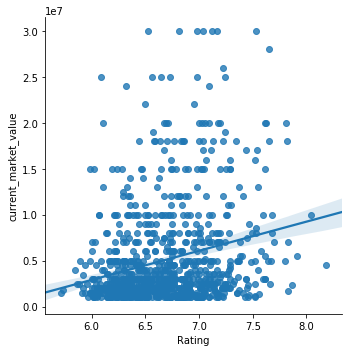

In [40]:
g = sns.lmplot(x="Rating", y="current_market_value", data=df_st)

In [41]:
df_st['Rating'].corr(df_st['current_market_value'])

0.24406686216136758

In [42]:
#looking by bins
Avg=df.groupby(['binned_values','Position'], as_index=False)['current_market_value'].mean()

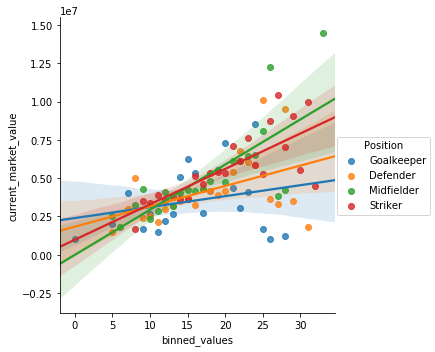

In [43]:
g = sns.lmplot(x="binned_values", y="current_market_value", hue="Position",data=Avg)
plt.show()

In [44]:
Avgy=df.groupby(['binny_values','Position'], as_index=False)['current_market_value'].mean()

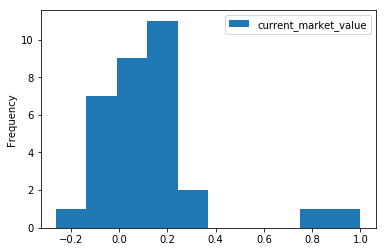

In [45]:
df_st_corr = df_st.corr()
df_st_corr[['current_market_value']].plot(kind='hist')

In [46]:
print(df_st_corr)

                        Height  Shoe.size  current_market_value  \
Height                1.000000   0.644206              0.021871   
Shoe.size             0.644206   1.000000             -0.261018   
current_market_value  0.021871  -0.261018              1.000000   
highest_market_value  0.031414  -0.068061              0.814843   
GpG                   0.164996  -0.046090              0.148443   
Assists/90min        -0.067402  -0.144721              0.131134   
Yel/90min             0.005227  -0.055288             -0.035866   
Red/90min             0.011312        NaN             -0.040330   
SpG                   0.076141  -0.191021              0.195543   
PS%                  -0.313952  -0.271505              0.134179   
Rating               -0.055042  -0.324527              0.244067   
Tackles              -0.211667  -0.455211             -0.022112   
Inter                -0.167948  -0.441558              0.027412   
Fouls (def)           0.169672  -0.262270             -0.08398

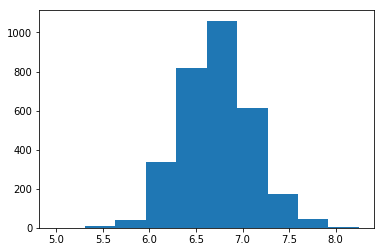

In [47]:
plt.hist(df['Rating'])
plt.show()

<function matplotlib.pyplot.show>

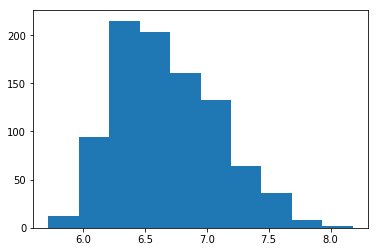

In [48]:
plt.hist(df_st['Rating'])
plt.show

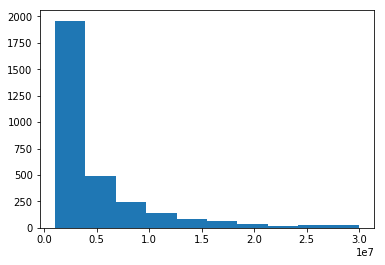

In [49]:
plt.hist(df['current_market_value'])
plt.show()

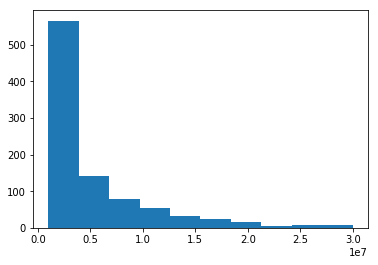

In [50]:
plt.hist(df_st['current_market_value'])
plt.show()

In [51]:
df_new = df[(df['Rating'] > 7) & (df['Rating'] < 8)]

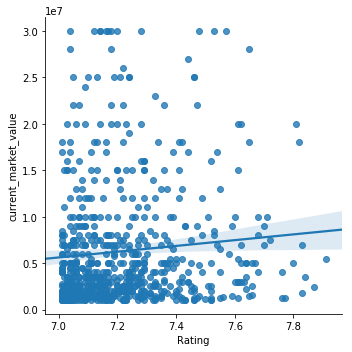

In [52]:
g = sns.lmplot(x="Rating", y="current_market_value", data=df_new)

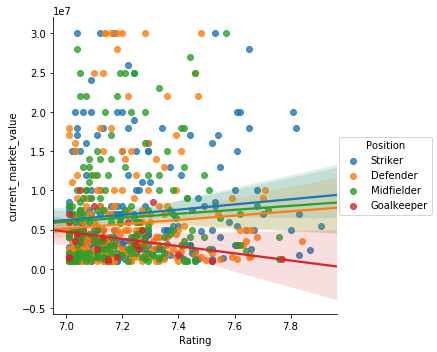

In [53]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="Position", data=df_new)

In [54]:
df_newt = df[(df['Rating'] > 7) & (df['Rating'] < 8)]

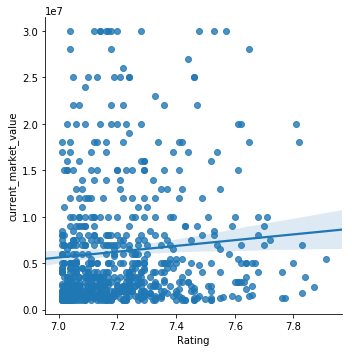

In [55]:
g = sns.lmplot(x="Rating", y="current_market_value", data=df_newt)

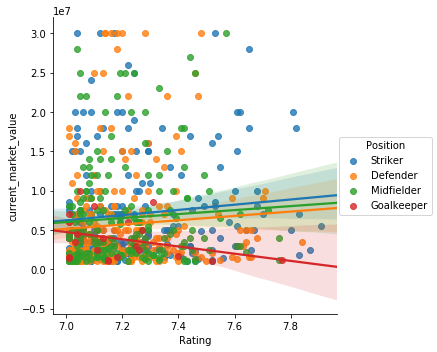

In [56]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="Position", data=df_newt)

In [57]:
df_new['Rating'].corr(df_new['current_market_value'])

0.088225626408952984

In [58]:
df_newt['Rating'].corr(df_newt['current_market_value'])

0.088225626408952984

In [59]:
#look at data from top 15 clubs and see what data looks like for these 
#repeat the same analysis but limit to top 15 clubs

In [60]:
#using original data frame (put these up top) 
#rat_bins=[5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10]
#df['binned_values'] = np.digitize(df.Rating.values, bins=rat_bins)   

In [61]:
Avg.describe()

,binned_values,current_market_value
count,96.000000,9.600000e+01
mean,17.989583,4.665296e+06
std,7.441696,2.471734e+06
min,0.000000,1.000000e+06
25%,12.000000,3.137403e+06
50%,18.000000,4.159052e+06
75%,24.000000,5.634375e+06
max,33.000000,1.450000e+07


In [129]:
sp.pearsonr(Avg['binned_values'], Avg['current_market_value'])

(0.59016423641439009, 2.4865042022156769e-10)

In [63]:
Avg.head()

,binned_values,Position,current_market_value
0,0,Goalkeeper,1000000.0
1,5,Defender,1500000.0
2,5,Goalkeeper,2000000.0
3,5,Midfielder,2500000.0
4,6,Midfielder,1800000.0


In [64]:
sp.pearsonr(df['binned_values'], df['current_market_value'])

(0.19007914271265242, 1.3628010114211155e-26)

In [65]:
sp.pearsonr(df['binny_values'], df['current_market_value'])

(0.18727357103067038, 7.5647864682744287e-26)

In [66]:
#let's assume the 15 most valuable clubs are the best at valuing talent
#maybe they have the most information, the most resources to find out
#According to forbes, Manchester United, Barcelona, Real Madrid, Bayern Munich, 
#Manchester City, Arsenal, Chelsea, Liverpool, Juventus, Tottenham Hotspur, 
#Paris Saint-Germain, Borussia Dortmund, AC Milan, Atletico de Madrid, West Ham United

In [67]:
top_teams = ['Manchester United', 'FC Barcelona', 'Real Madrid', 'Bayern Munich', 
'Manchester City', 'Arsenal FC', 'Chelsea FC', 'Liverpool FC', 'Juventus FC', 'Tottenham Hotspur', 
'Paris Saint-Germain', 'Borussia Dortmund', 'AC Milan', 'Atletico Madrid', 'West Ham United']
df_tt = df[df.current_club.isin(top_teams)]


In [68]:
df_tt.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african,binned_values,binny_values
2006,Dominic Solanke,"Sep 14, 1997","Basingstoke, England",19,1.86,NaN,"England, Nigeria",Striker,right,Liverpool FC,...,5.8,0.0,0.0,0.0,0.4,0.1,0.4,no,13,5
66,Michy Batshuayi,"Oct 2, 1993","Brussel, Belgium",23,1.85,NaN,"Belgium, Congo DR",Striker,both,Chelsea FC,...,8.6,0.0,0.1,0.0,0.3,0.2,0.6,no,16,7
183,Raphael Guerreiro,"Dec 22, 1993","Le Blanc-Mesnil, France",23,1.70,8.0,"Portugal, France",Defender,left,Borussia Dortmund,...,32.0,1.3,1.7,0.0,0.0,0.0,0.3,no,17,7
2201,Borja Mayoral,"Apr 5, 1997","Parla, Spain",20,1.83,NaN,Spain,Striker,right,Real Madrid,...,6.0,0.0,0.3,0.0,0.0,0.3,0.5,no,14,6
526,Diafra Sakho,"Dec 24, 1989","Guediawaye, Senegal",27,1.84,NaN,"Senegal, France",Striker,right,West Ham United,...,3.3,0.1,0.1,0.0,0.0,0.1,0.4,yes,11,5


In [107]:
#df = df[df['Column Name'].isin(['Value']) == False]
df_ntt = df[df['current_club'].isin(top_teams) == False]

In [108]:
df_ntt.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african,binned_values,binny_values
2794,Fred Friday,"May 22, 1995",Undefined,22,1.87,NaN,Nigeria,Striker,both,AZ Alkmaar,...,14.0,0.0,0.0,0.0,0.3,0.0,0.7,no,13,5
1355,Muhammet Demir,"Jan 10, 1992","Trabzon, Turkey",25,1.80,NaN,Turkey,Striker,right,Demir Grup Sivasspor,...,3.3,0.0,0.3,0.0,0.5,0.0,0.0,no,10,4
2425,Tornike Okriashvili,"Feb 12, 1992","Tiflis, Georgia",25,1.81,NaN,Georgia,Midfielder,both,FK Krasnodar,...,6.7,0.0,0.3,0.0,0.3,0.3,0.0,no,13,6
1799,Dawid Kownacki,"Mar 14, 1997","Gorzow Wielkopolski, Poland",20,1.85,NaN,Poland,Striker,right,UC Sampdoria,...,6.8,0.0,0.0,0.0,0.0,0.3,0.8,no,16,7
1091,Andy Najar,"Mar 16, 1993","Choluteca, Honduras",24,1.71,NaN,"Honduras, United States",Defender,right,RSC Anderlecht,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,no,12,5


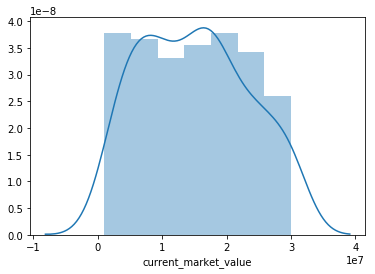

In [98]:
sns.distplot(df_tt['current_market_value'])

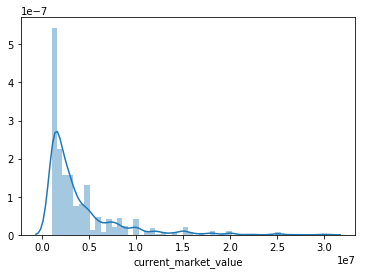

In [109]:
sns.distplot(df_ntt['current_market_value'])

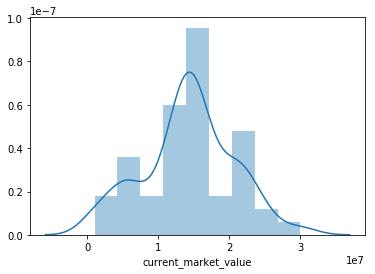

In [99]:
sns.distplot(Avg_tt['current_market_value'])

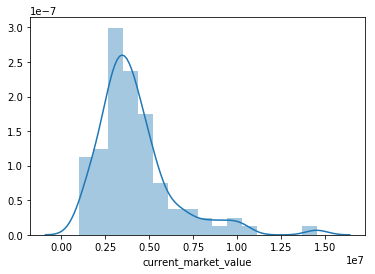

In [111]:
sns.distplot(Avg_ntt['current_market_value'])

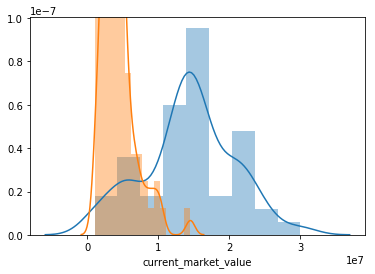

In [112]:
sns.distplot(Avg_tt['current_market_value'])
sns.distplot(Avg_ntt['current_market_value'])

In [103]:
Avg.describe()

,binned_values,current_market_value
count,96.000000,9.600000e+01
mean,17.989583,4.665296e+06
std,7.441696,2.471734e+06
min,0.000000,1.000000e+06
25%,12.000000,3.137403e+06
50%,18.000000,4.159052e+06
75%,24.000000,5.634375e+06
max,33.000000,1.450000e+07


In [69]:
Avg_tt=df_tt.groupby(['binned_values','Position'], as_index=False)['current_market_value'].mean()

In [110]:
Avg_ntt=df_ntt.groupby(['binned_values', 'Position'], as_index=False)['current_market_value'].mean()

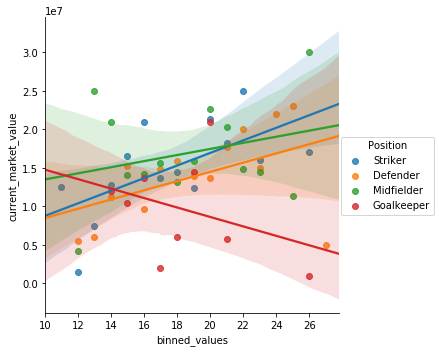

In [70]:
g = sns.lmplot(x="binned_values", y="current_market_value", hue="Position",data=Avg_tt)
plt.show()

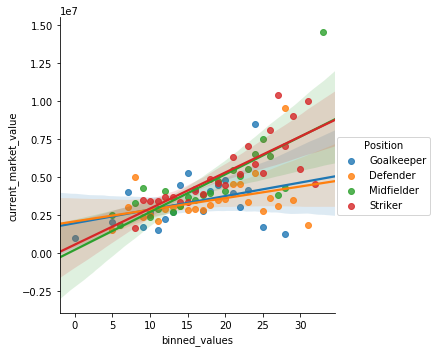

In [113]:
g = sns.lmplot(x="binned_values", y="current_market_value", hue="Position",data=Avg_ntt)
plt.show()

In [71]:
sp.pearsonr(Avg_tt['binned_values'], Avg_tt['current_market_value'])

(0.30146721351706268, 0.029865393639868856)

In [115]:
sp.pearsonr(Avg_ntt['binned_values'], Avg_ntt['current_market_value'])

(0.60208634772878, 1.089542005309203e-10)

In [149]:
sp.pearsonr(df_tt['Rating'], df_tt['current_market_value'])

(0.18649840970196782, 0.0075662653559725058)

In [150]:
sp.pearsonr(df_ntt['Rating'], df_ntt['current_market_value'])

(0.18999033080760505, 6.3283457438673368e-25)

In [116]:
Avg_tt.describe()

,binned_values,current_market_value
count,52.000000,5.200000e+01
mean,18.461538,1.426139e+07
std,4.263210,6.373654e+06
min,11.000000,1.000000e+06
25%,15.000000,1.131250e+07
50%,18.000000,1.450000e+07
75%,21.250000,1.781250e+07
max,27.000000,3.000000e+07


In [117]:
Avg_ntt.describe()

,binned_values,current_market_value
count,95.000000,9.500000e+01
mean,17.905263,4.183841e+06
std,7.434929,2.181714e+06
min,0.000000,1.000000e+06
25%,12.000000,2.861000e+06
50%,18.000000,3.684722e+06
75%,24.000000,4.848052e+06
max,33.000000,1.450000e+07


In [73]:
df_st_t = df[df['Position'] == 'Striker']

In [74]:
df_st_t.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african,binned_values,binny_values
2006,Dominic Solanke,"Sep 14, 1997","Basingstoke, England",19,1.86,NaN,"England, Nigeria",Striker,right,Liverpool FC,...,5.8,0.0,0.0,0.0,0.4,0.1,0.4,no,13,5
2794,Fred Friday,"May 22, 1995",Undefined,22,1.87,NaN,Nigeria,Striker,both,AZ Alkmaar,...,14.0,0.0,0.0,0.0,0.3,0.0,0.7,no,13,5
1355,Muhammet Demir,"Jan 10, 1992","Trabzon, Turkey",25,1.80,NaN,Turkey,Striker,right,Demir Grup Sivasspor,...,3.3,0.0,0.3,0.0,0.5,0.0,0.0,no,10,4
1799,Dawid Kownacki,"Mar 14, 1997","Gorzow Wielkopolski, Poland",20,1.85,NaN,Poland,Striker,right,UC Sampdoria,...,6.8,0.0,0.0,0.0,0.0,0.3,0.8,no,16,7
1011,Munas Dabbur,"May 14, 1992","Nazareth, Israel",25,1.82,NaN,Israel,Striker,right,Red Bull Salzburg,...,34.8,0.0,1.0,0.3,1.5,0.0,2.0,no,24,10


In [75]:
df_st_tt = df_st_t['current_market_value']              
df_st_tt.describe()

count    9.280000e+02
mean     5.046552e+06
std      5.391796e+06
min      1.000000e+06
25%      1.675000e+06
50%      3.000000e+06
75%      6.000000e+06
max      3.000000e+07
Name: current_market_value, dtype: float64

In [76]:
df_pos_t = df[df['Position'] != 'Striker']

In [77]:
df_pos_t.head()

,Name,date_of_birth,place_of_birth,Age,Height,Shoe.size,Nationality,Position,Foot,current_club,...,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,west_african,binned_values,binny_values
2425,Tornike Okriashvili,"Feb 12, 1992","Tiflis, Georgia",25,1.81,NaN,Georgia,Midfielder,both,FK Krasnodar,...,6.7,0.0,0.3,0.0,0.3,0.3,0.0,no,13,6
1091,Andy Najar,"Mar 16, 1993","Choluteca, Honduras",24,1.71,NaN,"Honduras, United States",Defender,right,RSC Anderlecht,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,no,12,5
183,Raphael Guerreiro,"Dec 22, 1993","Le Blanc-Mesnil, France",23,1.70,8.0,"Portugal, France",Defender,left,Borussia Dortmund,...,32.0,1.3,1.7,0.0,0.0,0.0,0.3,no,17,7
1163,Mile Jedinak,"Aug 3, 1984","Sydney, Australia",33,1.89,NaN,"Australia, Croatia",Midfielder,right,Aston Villa,...,14.5,0.0,0.8,0.0,0.0,0.0,0.5,no,19,8
596,Siem de Jong,"Jan 28, 1989","Aigle, Switzerland",28,1.85,NaN,Netherlands,Midfielder,right,Ajax Amsterdam,...,9.8,0.0,0.2,0.0,0.2,0.2,0.8,no,17,7


In [78]:
df_pos_tt = df_pos_t['current_market_value']

In [79]:
df_pos_tt.head()

2425     1500000.0
1091     5000000.0
183     20000000.0
1163     4500000.0
596      5500000.0
Name: current_market_value, dtype: float64

In [80]:
df_pos_tt.describe()

count    2.170000e+03
mean     4.594806e+06
std      5.267482e+06
min      1.000000e+06
25%      1.500000e+06
50%      2.500000e+06
75%      5.000000e+06
max      3.000000e+07
Name: current_market_value, dtype: float64

In [81]:
#can say with some confidence that we can reject the null hypothesis 
#that there is not a difference between market value of strikers versus 
#the other positions
ttest_ind(df_st_tt, df_pos_tt)

Ttest_indResult(statistic=2.1710538421926575, pvalue=0.030002832428056486)

In [82]:
df_posng_t = df_pos_t[df_pos_t['Position'] != 'Goalkeeper']

In [83]:
df_posng_tt = df_posng_t['current_market_value']

In [84]:
df_posng_tt.head()

2425     1500000.0
1091     5000000.0
183     20000000.0
1163     4500000.0
596      5500000.0
Name: current_market_value, dtype: float64

In [85]:
#take out goalkeeper and the pvalue is not as low
ttest_ind(df_st_tt, df_posng_tt)

Ttest_indResult(statistic=2.0709443682773538, pvalue=0.038452080980359994)

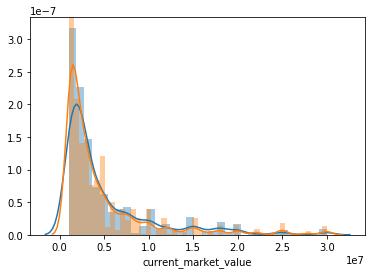

In [119]:
sns.distplot(df_st_t['current_market_value'])
sns.distplot(df_posng_t['current_market_value'])

In [86]:
df_new_tt = df_new['current_market_value']

In [87]:
df_new_tt.head()

1011     5000000.0
590     10000000.0
831      8000000.0
198     20000000.0
2462     1000000.0
Name: current_market_value, dtype: float64

In [88]:
df_newt_tt = df_newt['current_market_value']

In [89]:
df_newt_tt.head()

1011     5000000.0
590     10000000.0
831      8000000.0
198     20000000.0
2462     1000000.0
Name: current_market_value, dtype: float64

In [90]:
ttest_ind(df_new_tt, df_newt_tt)

Ttest_indResult(statistic=0.0, pvalue=1.0)

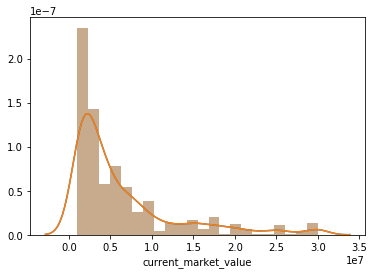

In [91]:
sns.distplot(df_new['current_market_value'])
sns.distplot(df_newt['current_market_value'])

In [92]:
#the average market value of players rated low
df_new.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,binned_values,binny_values
count,673.000000,19.000000,6.750000e+02,6.750000e+02,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,...,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,1.818900,10.289474,6.300667e+06,8.321111e+06,0.274489,0.147170,0.193689,0.006741,1.397333,78.804593,...,1.039259,39.177630,0.499111,2.475259,0.060296,0.575407,0.093926,0.733037,22.785185,9.468148
std,0.068773,1.346970,6.515196e+06,7.556564e+06,0.322541,0.152653,0.167065,0.031623,1.049951,8.325460,...,0.784295,14.872124,0.655698,1.840243,0.097566,0.583492,0.139760,0.665015,1.856839,0.716554
min,1.640000,8.000000,1.000000e+06,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,33.900000,...,0.000000,7.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,9.000000
25%,1.770000,9.250000,2.000000e+06,2.500000e+06,0.000000,0.000000,0.080000,0.000000,0.600000,74.950000,...,0.400000,27.700000,0.000000,1.100000,0.000000,0.100000,0.000000,0.300000,21.000000,9.000000
50%,1.820000,10.500000,4.000000e+06,5.000000e+06,0.170000,0.110000,0.160000,0.000000,1.100000,80.200000,...,0.900000,39.400000,0.200000,2.100000,0.000000,0.400000,0.000000,0.500000,22.000000,9.000000
75%,1.870000,10.750000,8.000000e+06,1.200000e+07,0.420000,0.240000,0.290000,0.000000,2.100000,84.400000,...,1.500000,48.400000,0.800000,3.400000,0.100000,0.900000,0.100000,1.100000,24.000000,10.000000
max,1.990000,13.000000,3.000000e+07,3.000000e+07,3.250000,0.840000,1.510000,0.360000,5.300000,96.300000,...,3.900000,101.100000,3.300000,10.200000,0.800000,3.300000,0.800000,3.900000,30.000000,12.000000


In [93]:
#the average market value of players rated high 
df_newt.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,binned_values,binny_values
count,673.000000,19.000000,6.750000e+02,6.750000e+02,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,...,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,1.818900,10.289474,6.300667e+06,8.321111e+06,0.274489,0.147170,0.193689,0.006741,1.397333,78.804593,...,1.039259,39.177630,0.499111,2.475259,0.060296,0.575407,0.093926,0.733037,22.785185,9.468148
std,0.068773,1.346970,6.515196e+06,7.556564e+06,0.322541,0.152653,0.167065,0.031623,1.049951,8.325460,...,0.784295,14.872124,0.655698,1.840243,0.097566,0.583492,0.139760,0.665015,1.856839,0.716554
min,1.640000,8.000000,1.000000e+06,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,33.900000,...,0.000000,7.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,9.000000
25%,1.770000,9.250000,2.000000e+06,2.500000e+06,0.000000,0.000000,0.080000,0.000000,0.600000,74.950000,...,0.400000,27.700000,0.000000,1.100000,0.000000,0.100000,0.000000,0.300000,21.000000,9.000000
50%,1.820000,10.500000,4.000000e+06,5.000000e+06,0.170000,0.110000,0.160000,0.000000,1.100000,80.200000,...,0.900000,39.400000,0.200000,2.100000,0.000000,0.400000,0.000000,0.500000,22.000000,9.000000
75%,1.870000,10.750000,8.000000e+06,1.200000e+07,0.420000,0.240000,0.290000,0.000000,2.100000,84.400000,...,1.500000,48.400000,0.800000,3.400000,0.100000,0.900000,0.100000,1.100000,24.000000,10.000000
max,1.990000,13.000000,3.000000e+07,3.000000e+07,3.250000,0.840000,1.510000,0.360000,5.300000,96.300000,...,3.900000,101.100000,3.300000,10.200000,0.800000,3.300000,0.800000,3.900000,30.000000,12.000000


In [94]:
#average market value of the entire data set 
df.describe()

,Height,Shoe.size,current_market_value,highest_market_value,GpG,Assists/90min,Yel/90min,Red/90min,SpG,PS%,...,KeyP,AvgP,Crosses,LongB,ThrB,OutOfBox,SixYardBox,PenaltyArea,binned_values,binny_values
count,3093.000000,101.000000,3.098000e+03,3.098000e+03,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,...,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000,3098.000000
mean,1.816980,9.896040,4.730126e+06,6.522240e+06,0.209635,0.086679,0.243231,0.011801,0.911814,77.192673,...,0.675274,30.577728,0.319496,2.108554,0.034797,0.391317,0.058457,0.467172,17.757263,7.404454
std,0.066621,1.215148,5.308189e+06,6.358421e+06,0.396043,0.156900,0.360977,0.061853,0.822725,10.636448,...,0.612771,15.528745,0.480778,2.036398,0.082402,0.453279,0.109396,0.508237,3.763661,1.528992
min,1.600000,7.500000,1.000000e+06,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.770000,9.000000,1.500000e+06,2.000000e+06,0.000000,0.000000,0.000000,0.000000,0.300000,72.625000,...,0.200000,18.700000,0.000000,0.600000,0.000000,0.000000,0.000000,0.100000,15.000000,6.000000
50%,1.820000,10.000000,2.500000e+06,4.000000e+06,0.060000,0.000000,0.170000,0.000000,0.700000,79.000000,...,0.500000,29.450000,0.100000,1.500000,0.000000,0.300000,0.000000,0.300000,18.000000,7.000000
75%,1.860000,10.500000,5.000000e+06,8.000000e+06,0.270000,0.130000,0.320000,0.000000,1.300000,84.000000,...,1.000000,41.000000,0.500000,3.000000,0.000000,0.600000,0.100000,0.700000,20.000000,8.000000
max,2.030000,13.000000,3.000000e+07,3.000000e+07,4.550000,2.900000,4.090000,1.650000,5.300000,100.000000,...,4.200000,101.100000,3.300000,13.000000,1.000000,3.700000,1.000000,3.900000,33.000000,14.000000


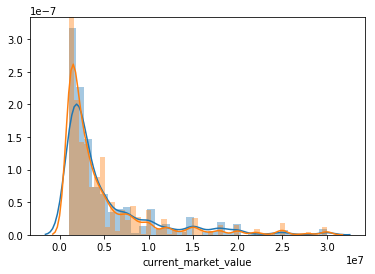

In [95]:
sns.distplot(df_st_t['current_market_value'])
sns.distplot(df_pos_t['current_market_value'])


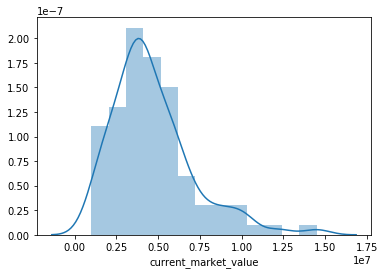

In [96]:
sns.distplot(Avg['current_market_value'])

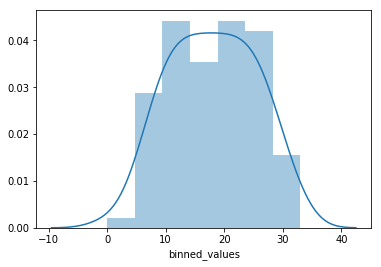

In [97]:
sns.distplot(Avg['binned_values'])

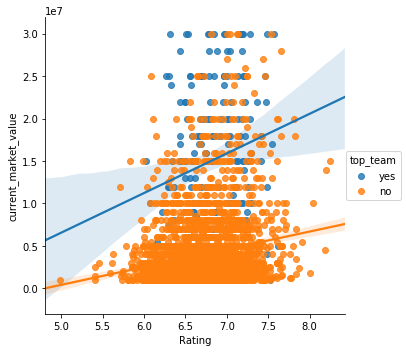

In [128]:
g = sns.lmplot(x="Rating", y="current_market_value", hue="top_team", data=df)

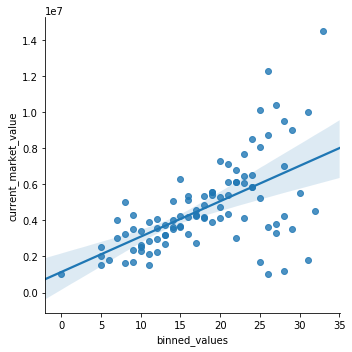

In [131]:
g = sns.lmplot(x="binned_values", y="current_market_value", data=Avg)

In [140]:
df_tt_tt = df_tt['current_market_value']

In [145]:
df_ntt_tt = df_ntt['current_market_value']

In [146]:
ttest_ind(df_tt_tt, df_ntt_tt)

Ttest_indResult(statistic=33.512302735408063, pvalue=2.3291142040533153e-210)

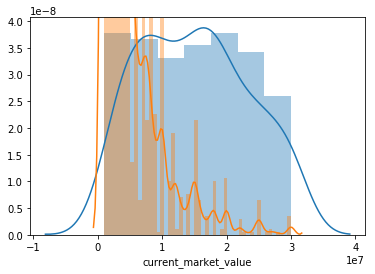

In [148]:
sns.distplot(df_tt['current_market_value'])
sns.distplot(df_ntt['current_market_value'])